In [1]:
from Results.utils_tables import *
import os 

In [2]:
tuning_folder=os.path.join(os.getcwd(),"Tuning")


# Cleaning

In [3]:
def get_best_parameters(tuning_table,par_type): #Par_type can be "CROSSOVER" or "MUT"
    # #Make copy to work with
    # tuning_copy=tuning_table.copy()
    #Sorting and selecting 
    tuning_table=tuning_table.sort_values("Av_Best",ascending=False)
    best_cross_counts=tuning_table[par_type][:50].value_counts()
    return best_cross_counts.keys()




In [4]:
table_list=[table for table in os.listdir(tuning_folder) if "csv" in table]
print(table_list)
tuning_dict={}
for table in table_list:
    #open table
    tuning_table=pd.read_csv(os.path.join(tuning_folder,table))
    
    #Av_Best (1/Av)
    tuning_table["Av_Best"]=tuning_table["Av_Best"].apply(lambda x: 1/x)
    #Normalize cols
    metric_list=["Av_Best"]
    tuning_table=normalise_metrics(metric_list,tuning_table)

    # #Getting best_cross 
    best_cross=get_best_parameters(tuning_table,"CROSS")
    tuning_table=tuning_table[tuning_table["CROSS"].isin(best_cross)]
    #append
    tuning_dict[table]=tuning_table
    #clear
    del tuning_table



['Results_rondrit016.csv', 'Results_rondrit048.csv', 'Results_rondrit070.csv', 'Results_rondrit127.csv']


# Getting tables with only best Mut/Cross operator

In [5]:
#best hyperparameters
best_cross_op=["cross_sequential_constructive"]
best_mut=["mut_RSM"]

best_dict={}
for key in tuning_dict.keys():
    test_table=tuning_dict[key].copy()

    test_table=test_table[test_table["CROSS"].isin(best_cross_op)]
    test_table=test_table[test_table["MUT"].isin(best_mut)] 
    
    best_dict[key]=test_table
    
    del test_table
    


# Plotting (with tuning_dict)

In [ ]:
import seaborn as sns

In [ ]:
for key in tuning_dict.keys():
    sns.catplot(x="CROSS", y="Av_Best_unit",hue="MUT",kind="swarm", data=tuning_dict[key]);


In [ ]:
for key in tuning_dict.keys():
    sns.catplot(x="CROSS", y="Av_Best_unit",hue="MUT",kind="box", data=tuning_dict[key]);


In [ ]:
for key in tuning_dict.keys():
    sns.jointplot(x="PR_CROSS", y="Av_Best_unit",data=tuning_dict[key]);


# Pr_Cross/Mut for best Cross,Mut

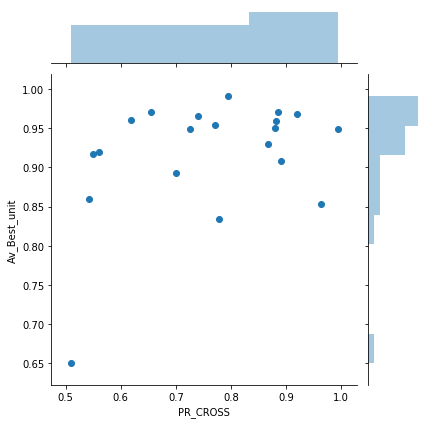

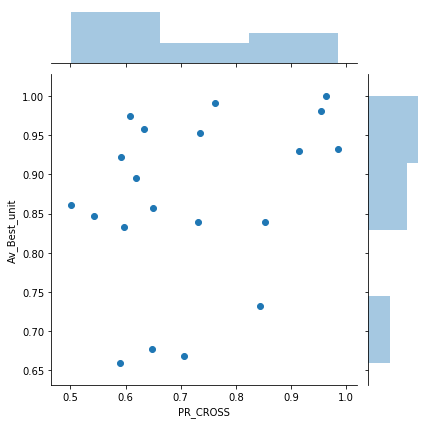

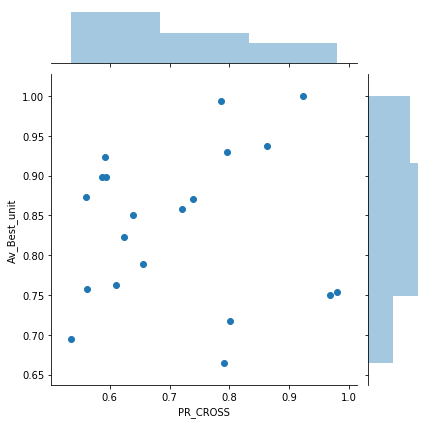

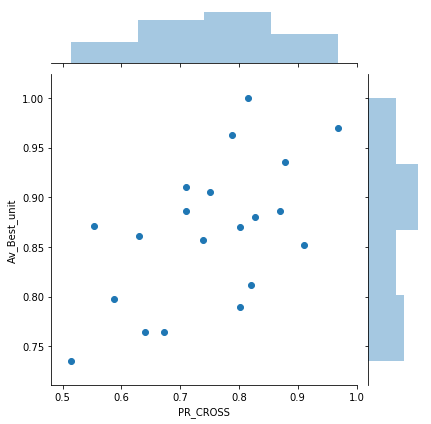

In [7]:
for key in tuning_dict.keys():
    sns.jointplot(x="PR_CROSS", y="Av_Best_unit",data=best_dict[key]);

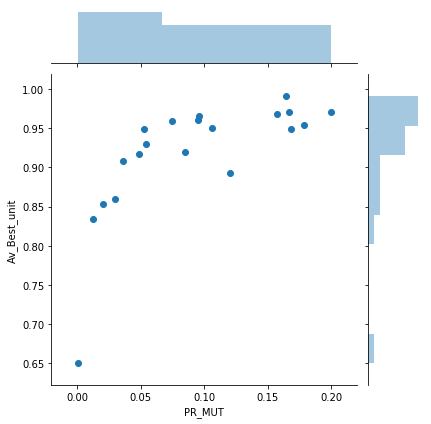

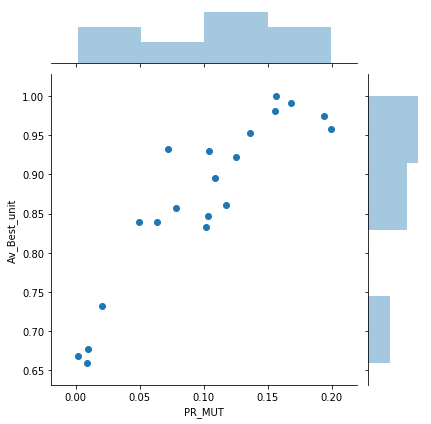

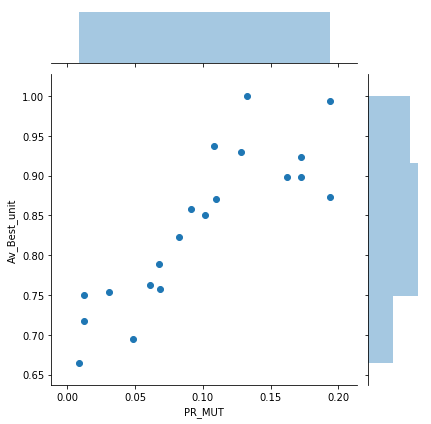

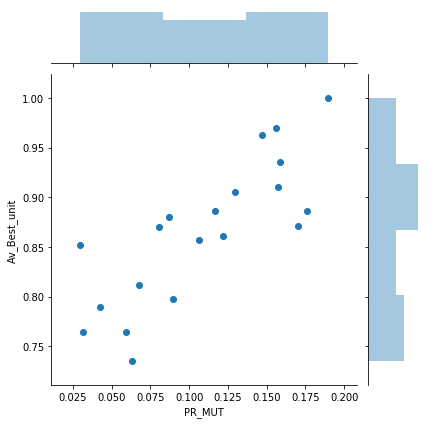

In [8]:
for key in tuning_dict.keys():
    sns.jointplot(x="PR_MUT", y="Av_Best_unit",data=best_dict[key]);

# Finetune Results

In [3]:
finetune_list=[table for table in os.listdir(tuning_folder) if "finetune" in table]


['Results_finetune_rondrit016.csv',
 'Results_finetune_rondrit048.csv',
 'Results_finetune_rondrit070.csv',
 'Results_finetune_rondrit127.csv']

In [28]:
##Cleaning
finetune_dict={}
for table in finetune_list:
    #open table
    finetune_table=pd.read_csv(os.path.join(tuning_folder,table))
    #Cleaning
    finetune_table=finetune_table.drop(columns=["CROSS","MUT","PR_MUT","Eff_1"])

    #Av_Best (1/Av)
    finetune_table["Av_Best"]=finetune_table["Av_Best"].apply(lambda x: 1/x)
    #Normalize cols
    metric_list=["Av_Best"]
    finetune_table=normalise_metrics(metric_list,finetune_table)
    #Create and concatenate Dataset Col
    #Getting dataset name    
    name, _ = os.path.splitext(table) 
    dataset_name=name.split("Results_finetune_")[1]

    test_set=pd.Series([dataset_name for i in range(len(finetune_table))],name="Dataset")
    finetune_table=pd.concat([test_set, finetune_table],axis=1)

    #append
    finetune_dict[table]=finetune_table
    #clear
    del finetune_table, test_set

In [36]:
#Create table combining results across datasets
for i,key in enumerate(finetune_dict.keys()):
    if(i==0):
        def_table=finetune_dict[key]
    else:
        def_table=def_table.append(finetune_dict[key])

# Plotting 


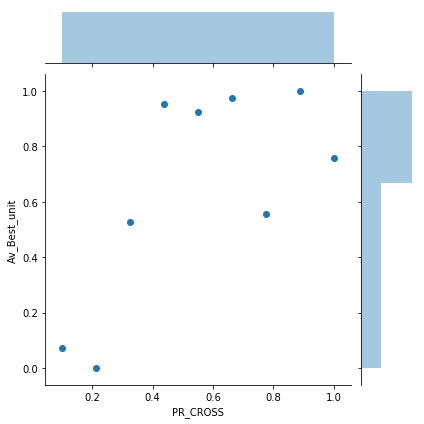

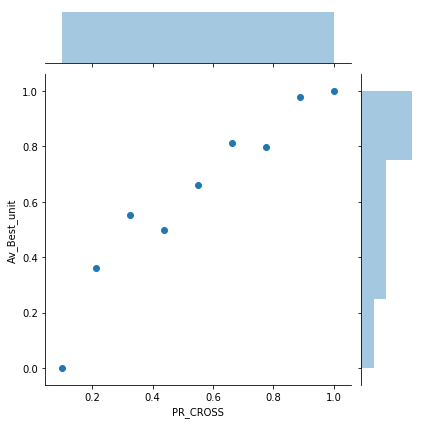

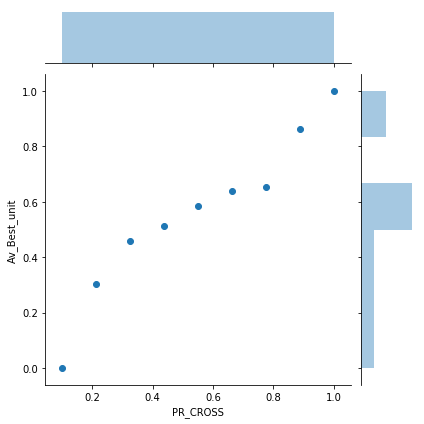

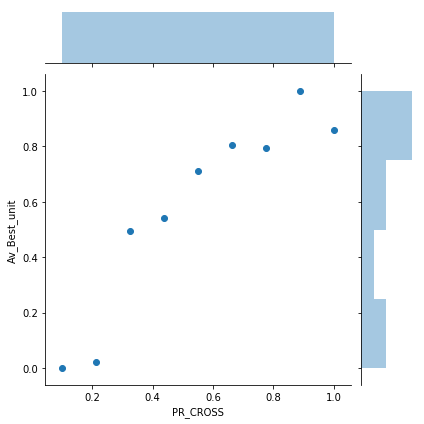

In [5]:
for key in finetune_dict.keys():
    sns.jointplot(x="PR_CROSS", y="Av_Best_unit",data=finetune_dict[key]);

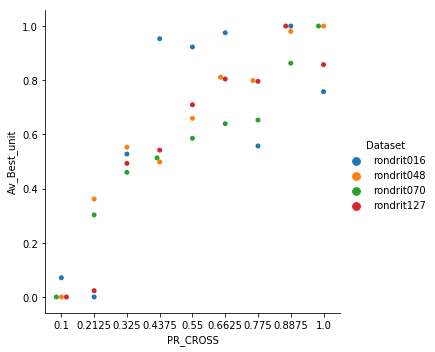

In [38]:
sns.catplot(x="PR_CROSS", y="Av_Best_unit",hue="Dataset",kind="swarm", data=def_table);